In [13]:
import numpy as np
import math
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_lsq_spline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


rho = 4.5
A = 2

def epsilon(L, W): 
    return 1 - W/(rho*A*L)

def kay(dP, Q, L, t): 
    eta = 1.797  #https://mterm-pro.com/viscosity/ at 20 degree Celsius
    return (eta*L*Q) / (dP*A*t)

def Sw(epsilon, k): 
    return 14/rho * (epsilon**3 / (k*(1-epsilon)**2))**0.5
    # return epsilon**3 / (k*(1-epsilon)**2)

def dm(Sw): 
    return 6/(rho*Sw)

def init_df():
    df = pd.DataFrame(columns=['dP', 'Q', 'A', 'L', 'W', 'epsilon', 't', 'k', 'Sw', 'dm'], index=range(0,9))
    df['dP'][0:3] = 15
    df['dP'][3:6] = 30
    df['dP'][6:9] = 60
    df['Q'][0:3] = [5,10,20]
    df['Q'][3:6] = [5,10,20]
    df['Q'][6:9] = [5,10,20]
    return df

def compute_df(df, L, W, t): 
    df['A'] = A
    df['L'] = L
    df['W'] = W
    df['epsilon'] = epsilon(df['L'].values, df['W'].values)
    df['t'] = t
    df['k'] = kay(df['dP'].values, df['Q'].values, df['L'].values, t)
    df['Sw'] = Sw(df['epsilon'].values, df['k'].values, )
    df['dm'] = dm(df['Sw'])
    return df

def display_df(df): 
    return df['dP'].values

def division(X, division_number=50): 
    return np.linspace(np.min(X),np.max(X), division_number)

def spline(X, Y, k=3, division_number=50): 
    model = make_interp_spline(X,Y,k=k)
    # model = UnivariateSpline(X, Y, k=k)
    # model = make_lsq_spline(X, Y, t=np.arange(len(X)), k=k)
    # X_spline = np.linspace(X[0], X[-1], division_number)
    X_spline = division(X)
    Y_spline = model(X_spline)
    return X_spline, Y_spline

def polyreg(X, Y, degree, test_value): 
    X = X.reshape(-1,1)
    Y = Y.reshape(-1,1)
    test_value = test_value.reshape(-1,1)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,Y)
    return model.predict(test_value)

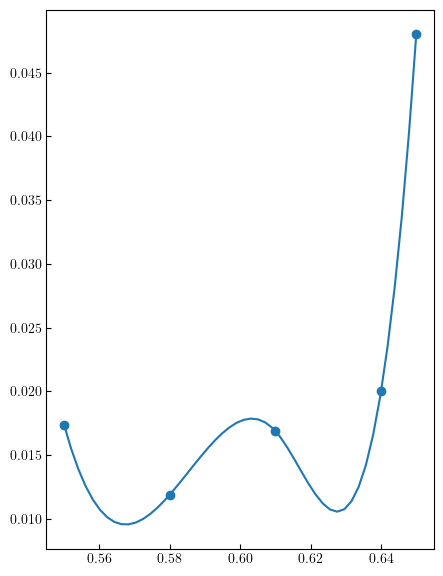

In [16]:
ep = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
dm = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])

xs, ys = spline(ep, dm, k=3)



fig, ax = plt.subplots(figsize=(5,7))
ax.scatter(ep, dm)
# ax.plot(ep,dm)
ax.plot(xs, ys)

In [14]:
x = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])



t = [-1, 0, 1]
k = 3
t = np.r_[(x[0],)*(k+1), t, (x[-1],)*(k+1)]

# spl = make_lsq_spline(x, y, t, k=k)
# xs = np.linspace(5.5e-1, 6.5e-1, 100)

# plt.subplots()
# plt.plot(x, y, 'ro', ms=5, label='data')
# plt.plot(xs, spl(xs), label='LSQ spline')
# plt.legend(loc='best')
# plt.show()

t

array([ 0.55,  0.55,  0.55,  0.55, -1.  ,  0.  ,  1.  ,  0.65,  0.65,
        0.65,  0.65])

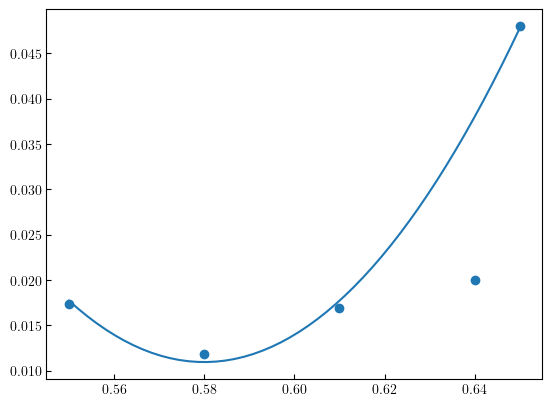

In [76]:
x1 = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y1 = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])

x = np.array([5.5e-1, 5.8e-1, 6.1e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 4.8e-2])


xs = division(x)
ys = polyreg(x,y,2,xs)

plt.scatter(x1,y1)
plt.plot(xs,ys)

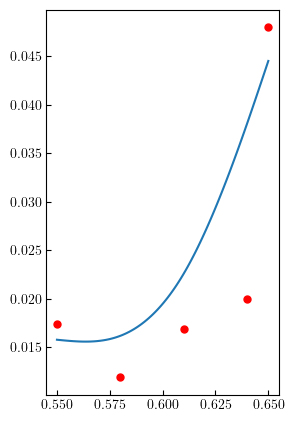

array([0.55, 0.55, 0.55, 0.55, 0.58, 0.61, 0.64, 0.65, 0.65, 0.65, 0.65])

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_smoothing_spline
from scipy.interpolate import make_lsq_spline


x = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])
w = np.array([10,1,5,1,10])
t = [0.58, 0.61, 0.64]
k = 3
t = np.r_[(x[0],)*(k+1), t, (x[-1],)*(k+1)]

spl = make_smoothing_spline(x, y, w)
# spl = make_lsq_spline(x,y,t)
xs = np.linspace(np.min(x),np.max(x), 100)

plt.figure(figsize=(3,5))
plt.plot(x, y, 'ro', ms=5, label='data')
plt.plot(xs, spl(xs), label='Smoothing spline')
plt.show()
t

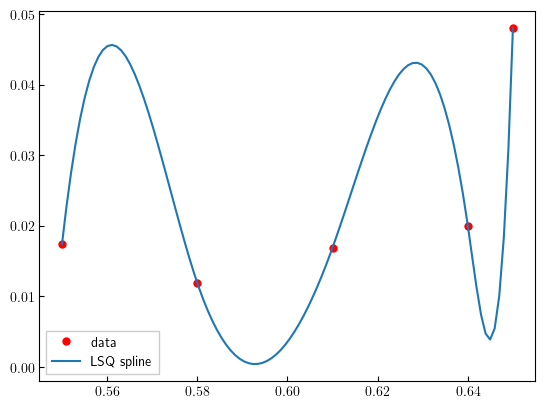

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_lsq_spline, BSpline


x = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])
w = np.array([1,1,1,0.1,1])
t = [0.58, 0.61, 0.64]
k =ArithmeticError 3
t = np.r_[(x[0],)*(k+1), t, (x[-1],)*(k+1)]
spl = make_lsq_spline(x, y, t ,k=3, w=w)
xs = np.linspace(np.min(x), np.max(x), 100)

plt.subplots()
plt.plot(x, y, 'ro', ms=5, label='data')
plt.plot(xs, spl(xs), label='LSQ spline')
plt.legend(loc='best')
plt.show()

In [79]:
import numpy as np
from scipy.optimize import minimize

# サンプルデータ生成
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # 仮のデータ（傾き2、切片1）

# 重み付き最小二乗法の定義
def weighted_least_squares(params, X, y, weights):
    y_pred = params[0] * X + params[1]
    residuals = y_pred - y
    weighted_residuals = residuals / np.sqrt(weights)  # 重みを考慮した残差
    return np.sum(weighted_residuals ** 2)

# 初期パラメータの設定
initial_params = [1.0, 0.0]

# 重みの設定（仮の値）
weights = np.random.rand(100)

# 最小化問題の定義
result = minimize(weighted_least_squares, initial_params, args=(X, y, weights))

# 結果の表示
print("最適なパラメータ:", result.x)



最適なパラメータ: [1.95402269 1.0215096 ]


In [ ]:


x = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])
w = np.array([1,1,1,0.1,1])

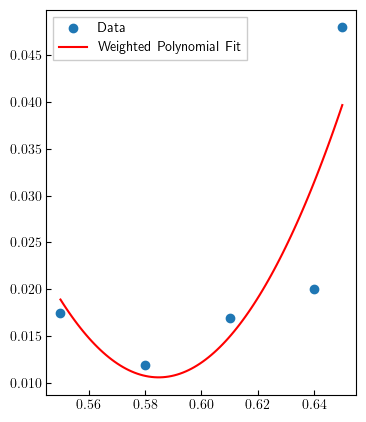

Fitted coefficients: [ 6.85722344 -8.020711    2.35597341]


In [96]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 重みつきの多項式モデル
def weighted_polynomial(x, *coefficients):
    return np.polyval(coefficients, x)

# データ生成（適当なデータを使用）
# np.random.seed(42)
# x_data = np.sort(5 * np.random.rand(20))
# y_data = 2 * x_data**2 - 3 * x_data + 1 + np.random.normal(0, 1, len(x_data))

x_data = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y_data = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])

# 重みつき最小二乗法のための重み（適当に設定）
weights = np.array([1,1.5,1,1,1])

# 初期の多項式係数を適当に設定
initial_guess = np.ones(3)

# 最小二乗法の実行
fit_coefficients, covariance = curve_fit(weighted_polynomial, x_data, y_data, p0=initial_guess, sigma=1/weights)

# プロット
plt.figure(figsize=(4,5))
plt.scatter(x_data, y_data, label='Data')
x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, weighted_polynomial(x_range, *fit_coefficients), 'r-', label='Weighted Polynomial Fit')
plt.legend()
plt.show()

print("Fitted coefficients:", fit_coefficients)
